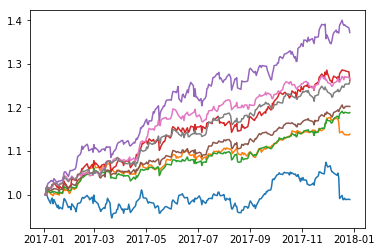

In [49]:
import datetime
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2017, 12, 27)
panel = web.DataReader(['VFWSX', 'MIEIX', 'LIPIX', 'FOCPX','WSMDX', 'SMLV', 'LGLV', '^GSPC'], 'yahoo', start, end)
df = panel['Adj Close']

van_emerging_adj_close = df['VFWSX']
van_emerging_cum_return = van_emerging_adj_close/van_emerging_adj_close[-1]
van_emerging_cum_return[0] = (van_emerging_adj_close[0] * (1-0.0001)) / van_emerging_adj_close[-1]

mfs_emerging_adj_close = df['MIEIX']
mfs_emerging_cum_return = mfs_emerging_adj_close/mfs_emerging_adj_close[-1]
mfs_emerging_cum_return[0] = (mfs_emerging_adj_close[0] * (1-0.0071)) / mfs_emerging_adj_close[-1]

life_adj_close = df['LIPIX']
life_cum_return = life_adj_close/life_adj_close[-1]
life_cum_return[0] = (life_adj_close[0] * (1-0.0022)) / life_adj_close[-1]

otc_adj_close = df['FOCPX']
otc_cum_return = otc_adj_close/otc_adj_close[-1]
otc_cum_return[0] = (otc_adj_close[0] * (1-0.0081)) / otc_adj_close[-1]

wsmdx_adj_close = df['WSMDX']
wsmdx_cum_return = wsmdx_adj_close/wsmdx_adj_close[-1]
wsmdx_cum_return[0] = (wsmdx_adj_close[0] * (1-0.016)) / wsmdx_adj_close[-1]

smlv_adj_close = df['SMLV']
smlv_cum_return = smlv_adj_close/smlv_adj_close[-1]

lglv_adj_close = df['LGLV']
lglv_cum_return = lglv_adj_close/lglv_adj_close[-1]

smp_adj_close = df['^GSPC']
smp_cum_return = smp_adj_close/smp_adj_close[-1]

cr_df = pd.DataFrame(smlv_cum_return, columns=['SMLV'])
cr_df['LGLV'] = lglv_cum_return
cr_df['^GSPC'] = smp_cum_return
cr_df['WSMDX'] = wsmdx_cum_return
cr_df['FOCPX'] = otc_cum_return
cr_df['LIPIX'] = life_cum_return
cr_df['MIEIX'] = mfs_emerging_cum_return
cr_df['VFWSX'] = van_emerging_cum_return

plt.plot(df.index.values, cr_df.values)
plt.show()